# Изучение данных о проявлениях депрессии

## Импорт необходимых библотек

In [180]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import kagglehub
import os
from tqdm import tqdm
# import torch

## Загрузка датасета

In [9]:
path = kagglehub.dataset_download("anthonytherrien/depression-dataset")
print("Path to dataset files:", path)
depr_df = pd.read_csv(f"{path}/depression_data.csv")
depr_df

Path to dataset files: /home/nikosolov/.cache/kagglehub/datasets/anthonytherrien/depression-dataset/versions/1


,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413763,Sean Miller,68,Married,Master's Degree,0,Former,Moderate,Employed,109233.43,Low,Healthy,Good,No,No,No,No
413764,Christina Brown,26,Single,Bachelor's Degree,0,Current,Active,Employed,96760.97,Low,Healthy,Poor,Yes,Yes,No,Yes
413765,Matthew Jenkins,57,Married,Bachelor's Degree,0,Non-smoker,Sedentary,Employed,77353.26,Moderate,Moderate,Fair,No,No,Yes,Yes
413766,Gary Faulkner,71,Married,Associate Degree,2,Non-smoker,Sedentary,Unemployed,24557.08,Moderate,Moderate,Poor,No,Yes,No,No


## Обзор датасета 

In [5]:
depr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

In [6]:
for i in depr_df.columns.values:
    print(i, depr_df[i].unique())

Name ['Christine Barker' 'Jacqueline Lewis' 'Shannon Church' ...
 'Madeline Butler' 'Travis Brewer' 'Gary Faulkner']
Age [31 55 78 58 18 20 60 50 77 70 59 33 66 38 25 32 52 49 28 56 37 27 69 46
 67 22 26 72 34 53 44 62 51 23 24 35 61 65 63 73 71 76 43 54 40 39 21 19
 64 36 30 45 80 41 48 42 68 75 57 47 79 74 29]
Marital Status ['Married' 'Widowed' 'Divorced' 'Single']
Education Level ["Bachelor's Degree" 'High School' "Master's Degree" 'Associate Degree'
 'PhD']
Number of Children [2 1 3 0 4]
Smoking Status ['Non-smoker' 'Former' 'Current']
Physical Activity Level ['Active' 'Sedentary' 'Moderate']
Employment Status ['Unemployed' 'Employed']
Income [ 26265.67  42710.36 125332.79 ...  77353.26  24557.08 107125.74]
Alcohol Consumption ['Moderate' 'High' 'Low']
Dietary Habits ['Moderate' 'Unhealthy' 'Healthy']
Sleep Patterns ['Fair' 'Good' 'Poor']
History of Mental Illness ['Yes' 'No']
History of Substance Abuse ['No' 'Yes']
Family History of Depression ['Yes' 'No']
Chronic Medical Conditi

В датасете можно выделить 12 классовых поля
- Marital Status (Семейное положение): 
    - Single (неженат/незамужем)
    - Married (женат/замужем), 
    - Divorced (разведен/разведена)
    - Widowed (вдовец/вдова), 
- Educational Level (Степень образования):
    - High School (Средняя школа)
    - Bachelor's Degree (Степень бакалавра)
    - Master's Degree (Степень магистра)
    - Associate Degree (Степень ассоциата, выпускник колледжа)
    - PhD (Докторская степень)
- Number Of Children (Количество детей): 0-4
- Smoking Status (Статус по курению):
    - Non-Smoker (Не курил)
    - Former (Бросил курить)
    - Current (Курит)
- Physical Activity Level (Уровень физической активности):
    - Sedentary (Сидячий образ жизни)
    - Moderate (Образ жизни средней активности)
    - Active (Активный образ жизни)

---

# Матрица отношений

Построим матрицы отношений между классовыми полями и полем `History of Mental Illness`

## Функция отрисовки матрицы отношений

**Входные данные**:
- `ax`: объект подграфика для прорисовки
- `depr_df`: DataFrame датасета
- `LabelX`: Название поля по Столбцам
- `ValuesX`: Значениям Столбцам
- `LabelY`: Название поля по Строкам
- `ValuesY`: Значениям Строкам

In [194]:
def draw_relation_matrix(ax, depr_df, LabelX, ValuesX, LabelY, ValuesY):
    data = np.zeros((len(ValuesY), len(ValuesX)), dtype=int)
    for i in range(len(ValuesX)):
        for j in range(len(ValuesY)):
            data[j][i] = depr_df[(depr_df[LabelY] == ValuesY[j]) & (depr_df[LabelX] == ValuesX[i])].shape[0]
            ax.text(i, j, 
                           f"{data[j, i]}\n{np.round(data[j, i]/depr_df.shape[0], decimals=3)}", 
                           ha="center", va="center", color="black")
    ax.imshow(data, cmap="cool")

    ax.set_xticks(np.arange(len(ValuesX)))
    ax.set_xticklabels(ValuesX)

    ax.set_yticks(np.arange(len(ValuesY)))
    ax.set_yticklabels(ValuesY)

    ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
    ax.set_xlabel(LabelX)    
    ax.xaxis.set_label_position('top')
    ax.set_ylabel(LabelY)     

(4, 3)


100%|██████████████████████████████████████████████████████████| 12/12 [00:03<00:00,  3.50it/s]


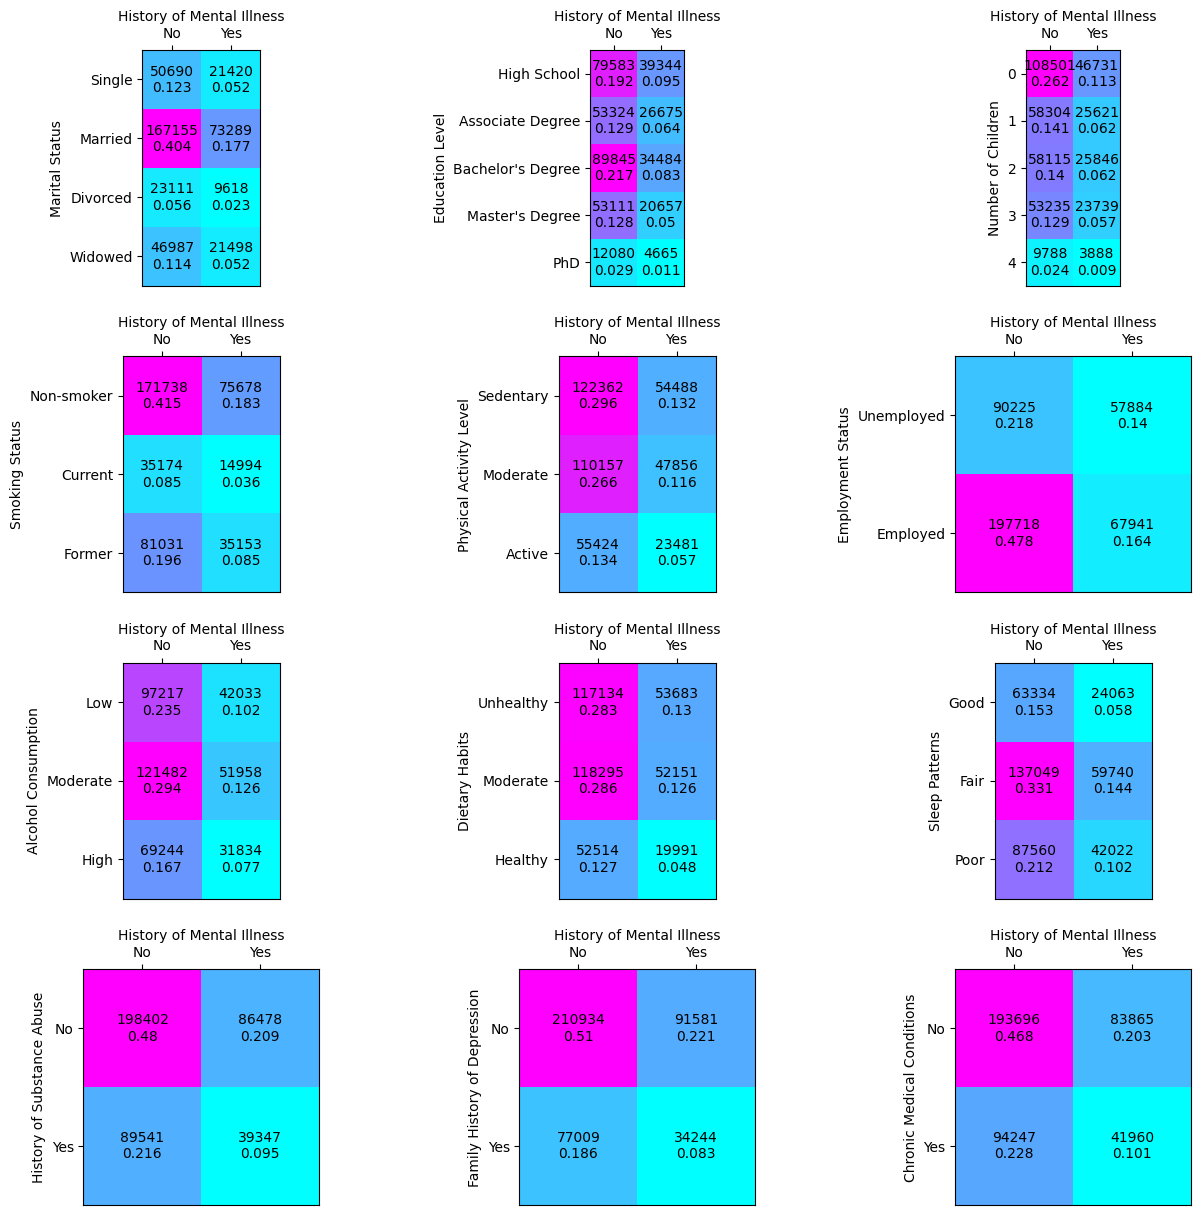

In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(15,15))
plt.subplots_adjust(hspace=0.3, wspace=0.5)
print(ax.shape)
# fig.tight_layout()
LabelX = "History of Mental Illness"

lib = {
    "Marital Status": ['Single', 'Married', 'Divorced', 'Widowed'],
    "Education Level": ['High School', 'Associate Degree', "Bachelor's Degree", "Master's Degree", 'PhD'],
    "Number of Children": [0, 1, 2, 3, 4],
    "Smoking Status": ['Non-smoker', 'Current', 'Former'],
    "Physical Activity Level": ['Sedentary', 'Moderate', 'Active'],
    "Employment Status": ['Unemployed', 'Employed'],
    "Alcohol Consumption": ['Low', 'Moderate', 'High'],
    "Dietary Habits": ['Unhealthy', 'Moderate', 'Healthy'],
    "Sleep Patterns": ['Good', 'Fair', 'Poor'],
    # "History of Mental Illness": ['No', 'Yes'],
    "History of Substance Abuse": ['No', 'Yes'],
    "Family History of Depression": ['No', 'Yes'],
    "Chronic Medical Conditions": ['No', 'Yes']
}

for i in tqdm(range(len(lib))):
    # print(i//3,i%3)
    draw_relation_matrix(
        ax[i//3,i%3], depr_df, 
        "History of Mental Illness", ["No", "Yes"],
        [*lib][i], lib[[*lib][i]])
    

plt.show()

## Выводы
По созданным диаграммам можно сделать несколько интересных выводов.

# Зависимость от заработка

100%|████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 17.95it/s]


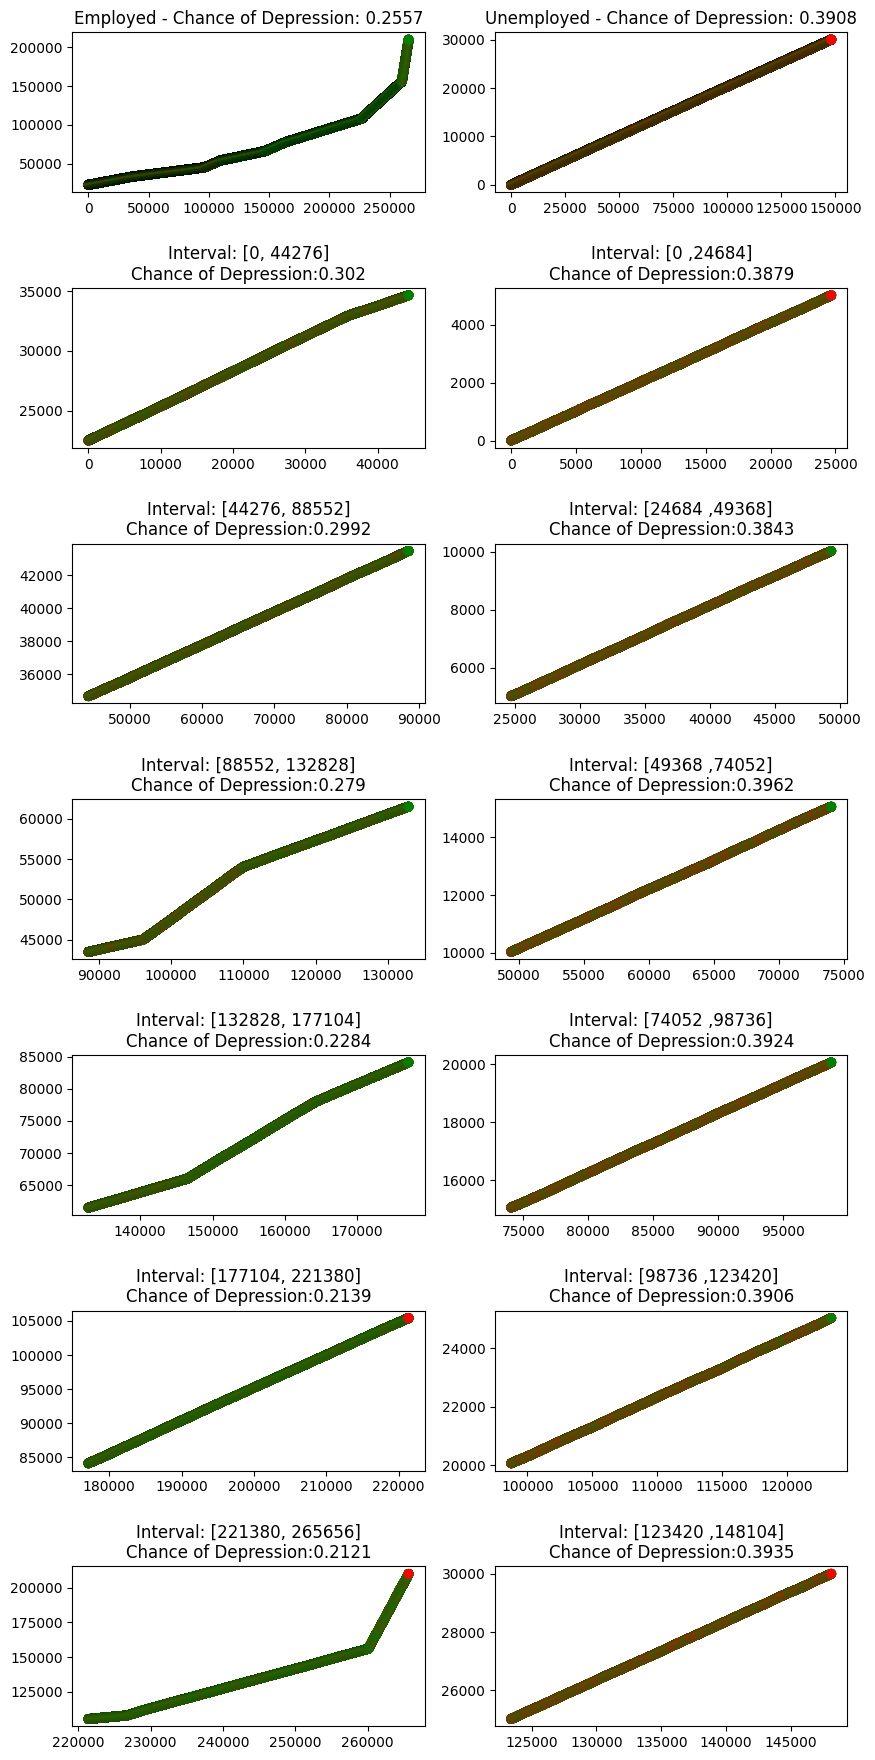

In [290]:
income_df = depr_df[
    ["Income", "Employment Status", "History of Mental Illness"]
].sort_values(by=['Income'])
income_df["Ill"] = income_df["History of Mental Illness"].map({"No": 0, "Yes": 1})
income_df["Emp"] = income_df["Employment Status"].map({"Unemployed": 0, "Employed": 1})
# print(income_df)
# ----------------------------------
emp_Y = income_df[income_df["Emp"]==1]["Income"].to_numpy()
emp_X = np.arange(emp_Y.shape[0])
emp_c_type = income_df[income_df["Emp"]==1]["Ill"].to_numpy()

unemp_Y = income_df[income_df["Emp"]==0]["Income"].to_numpy()
unemp_X = np.arange(unemp_Y.shape[0])
unemp_c_type = income_df[income_df["Emp"]==0]["Ill"].to_numpy()

emp_col = np.where(emp_c_type==1, 'r','g')
unemp_col = np.where(unemp_c_type==1, 'r','g')
rows = 6
# ------------------------------------
fig, ax = plt.subplots(rows+1,2, figsize=(10,22))
plt.subplots_adjust(hspace=0.6)

ax[0, 0].set_title(f"Employed - Chance of Depression: {np.round(emp_c_type.sum()/emp_c_type.shape[0], decimals=4)}")
ax[0, 0].scatter(emp_X, emp_Y, c=emp_col)

ax[0, 1].set_title(f"Unemployed - Chance of Depression: {np.round(unemp_c_type.sum()/unemp_c_type.shape[0], decimals = 4)}")
ax[0, 1].scatter(unemp_X, unemp_Y, c=unemp_col)
# ------------------------------------


emp_delta = emp_X.shape[0]//rows
unemp_delta = unemp_X.shape[0]//rows
for i in tqdm(range(rows)):
    unemp_cols = unemp_c_type[i*unemp_delta:(i+1)*unemp_delta]
    unemp_illness = np.round(unemp_cols.sum()/unemp_cols.shape[0], decimals=4)
    emp_cols = emp_c_type[i*emp_delta:(i+1)*emp_delta]
    emp_illness = np.round(emp_cols.sum()/emp_cols.shape[0], decimals=4)
    # cols[cols]
    ax[i+1, 0].set_title(
        f"Interval: [{i*emp_delta}, {(i+1)*emp_delta}]\nChance of Depression:{emp_illness}"
    )
    ax[i+1, 1].set_title(
        f"Interval: [{i*unemp_delta} ,{(i+1)*unemp_delta}]\nChance of Depression:{unemp_illness}")
    ax[i+1, 0].scatter(
        emp_X[i*emp_delta:(i+1)*emp_delta], 
        emp_Y[i*emp_delta:(i+1)*emp_delta], 
        c=emp_col[i*emp_delta:(i+1)*emp_delta])
    ax[i+1, 1].scatter(
        unemp_X[i*unemp_delta:(i+1)*unemp_delta], 
        unemp_Y[i*unemp_delta:(i+1)*unemp_delta], 
        c=unemp_col[i*unemp_delta:(i+1)*unemp_delta])


100%|███████████████████████████████████████████████████████| 30/30 [00:00<00:00, 24828.16it/s]


Text(0, 0.5, 'Chance of Depression')

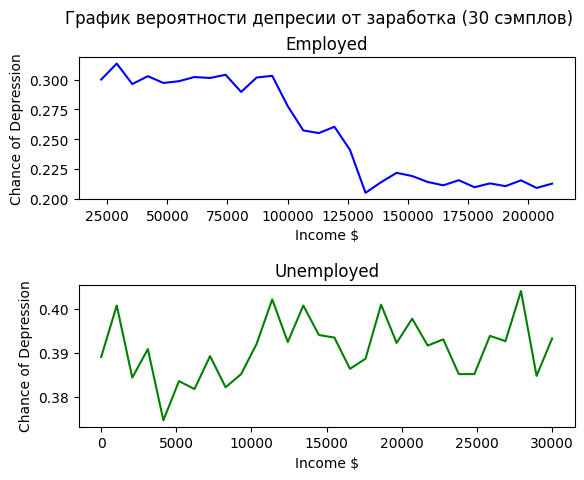

In [291]:
samples = 30
emp_delta = emp_X.shape[0]//samples
unemp_delta = unemp_X.shape[0]//samples
emp_illness_data = []
unemp_illness_data = []
for i in tqdm(range(samples)):
    unemp_cols = unemp_c_type[i*unemp_delta:(i+1)*unemp_delta]
    unemp_illness_data.append(
        np.round(unemp_cols.sum()/unemp_cols.shape[0], decimals=4)
    )
    emp_cols = emp_c_type[i*emp_delta:(i+1)*emp_delta]
    emp_illness_data.append(
        np.round(emp_cols.sum()/emp_cols.shape[0], decimals=4)
    )

emp_ill_X = np.linspace(emp_Y.min(), emp_Y.max(), samples)
emp_ill_Y = emp_illness_data
unemp_ill_X = np.linspace(unemp_Y.min(), unemp_Y.max(), samples)
unemp_ill_Y = unemp_illness_data


fig, ax = plt.subplots(2,1)
plt.subplots_adjust(hspace=0.6)
plt.suptitle(f"График вероятности депресии от заработка ({samples} сэмплов)")

ax[0].set_title("Employed")
ax[0].plot(emp_ill_X, emp_ill_Y, c='b')
ax[0].set_xlabel("Income $")
ax[0].set_ylabel("Chance of Depression")


ax[1].set_title("Unemployed")
ax[1].plot(unemp_ill_X, unemp_ill_Y, c='g')
ax[1].set_xlabel("Income $")
ax[1].set_ylabel("Chance of Depression")


100%|███████████████████████████████████████████████████████| 30/30 [00:00<00:00, 21450.58it/s]


Text(0, 0.5, 'Chance of Depression')

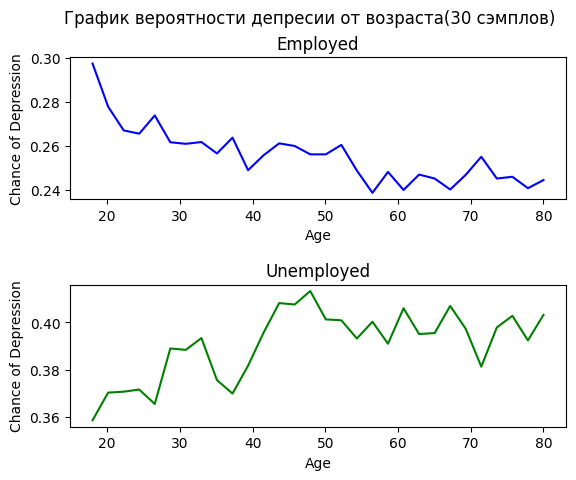

In [ ]:
income_df = depr_df[
    ["Age", "Employment Status", "History of Mental Illness"]
].sort_values(by=['Age'])
income_df["Ill"] = income_df["History of Mental Illness"].map({"No": 0, "Yes": 1})
income_df["Emp"] = income_df["Employment Status"].map({"Unemployed": 0, "Employed": 1})

emp_Y = income_df[income_df["Emp"]==1]["Age"].to_numpy()
emp_X = np.arange(emp_Y.shape[0])
emp_c_type = income_df[income_df["Emp"]==1]["Ill"].to_numpy()

unemp_Y = income_df[income_df["Emp"]==0]["Age"].to_numpy()
unemp_X = np.arange(unemp_Y.shape[0])
unemp_c_type = income_df[income_df["Emp"]==0]["Ill"].to_numpy()

emp_col = np.where(emp_c_type==1, 'r','g')
unemp_col = np.where(unemp_c_type==1, 'r','g')

samples = 0
emp_delta = emp_X.shape[0]//samples
unemp_delta = unemp_X.shape[0]//samples
emp_illness_data = []
unemp_illness_data = []
for i in tqdm(range(samples)):
    unemp_cols = unemp_c_type[i*unemp_delta:(i+1)*unemp_delta]
    unemp_illness_data.append(
        np.round(unemp_cols.sum()/unemp_cols.shape[0], decimals=4)
    )
    emp_cols = emp_c_type[i*emp_delta:(i+1)*emp_delta]
    emp_illness_data.append(
        np.round(emp_cols.sum()/emp_cols.shape[0], decimals=4)
    )

emp_ill_X = np.linspace(emp_Y.min(), emp_Y.max(), samples)
emp_ill_Y = emp_illness_data
unemp_ill_X = np.linspace(unemp_Y.min(), unemp_Y.max(), samples)
unemp_ill_Y = unemp_illness_data


fig, ax = plt.subplots(2,1)
plt.subplots_adjust(hspace=0.6)
plt.suptitle(f"График вероятности депресии от возраста({samples} сэмплов)")

ax[0].set_title("Employed")
ax[0].plot(emp_ill_X, emp_ill_Y, c='b')
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Chance of Depression")


ax[1].set_title("Unemployed")
ax[1].plot(unemp_ill_X, unemp_ill_Y, c='g')
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Chance of Depression")

100%|███████████████████████████████████████████████████████| 30/30 [00:00<00:00, 26111.04it/s]


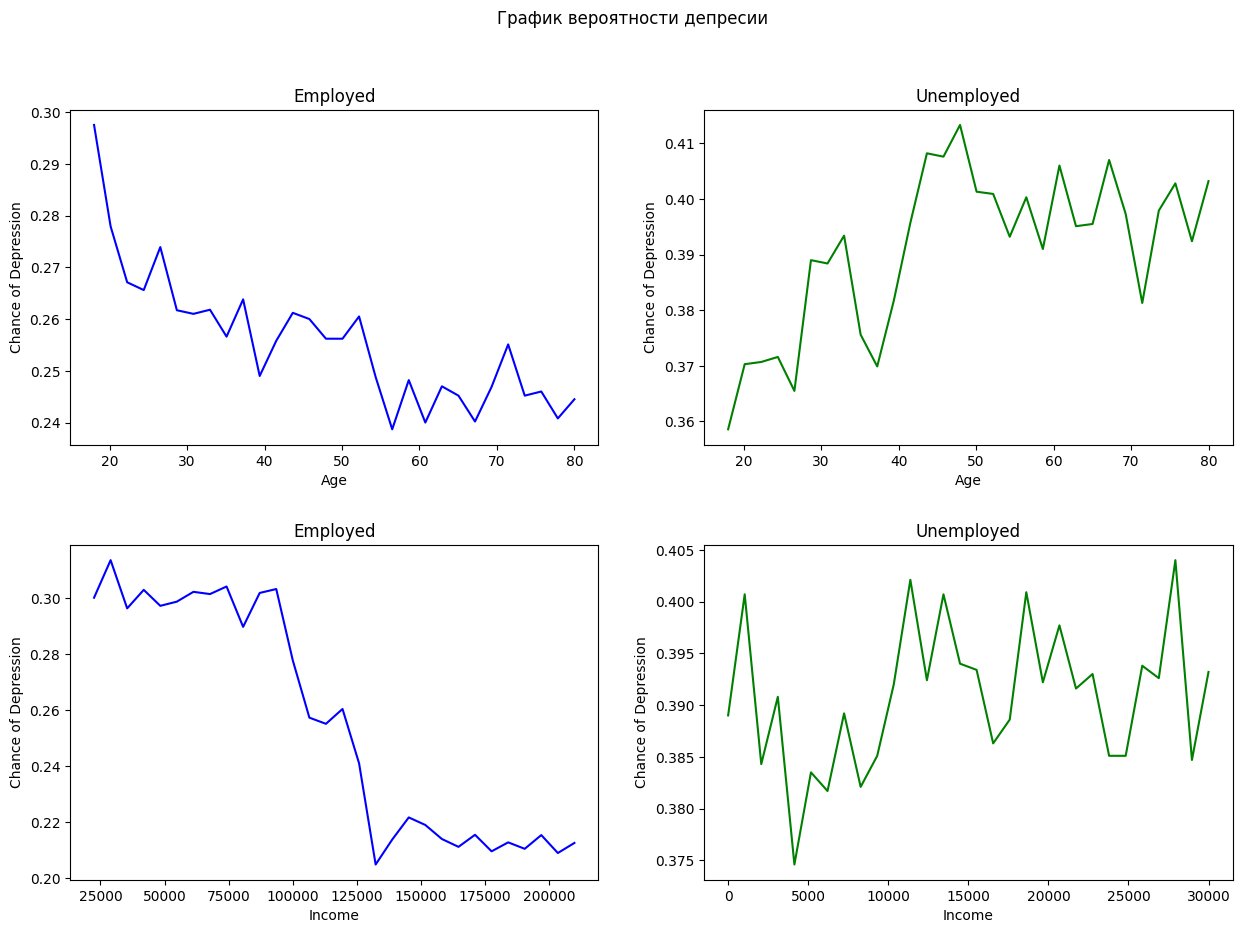

In [288]:
def plot_graph(depr_df, colNames, samples):
    fig, ax = plt.subplots(2,len(colNames), figsize=(15,10))
    plt.subplots_adjust(hspace=0.3, wspace=0.2)
    plt.suptitle(f"График вероятности депресии")

    for u in range(len(colNames)):
        income_df = depr_df[
            [colNames[u], "Employment Status", "History of Mental Illness"]
        ].sort_values(by=[colNames[u]])
        income_df["Ill"] = income_df["History of Mental Illness"].map({"No": 0, "Yes": 1})
        income_df["Emp"] = income_df["Employment Status"].map({"Unemployed": 0, "Employed": 1})

        emp_Y = income_df[income_df["Emp"]==1][colNames[u]].to_numpy()
        emp_X = np.arange(emp_Y.shape[0])
        emp_c_type = income_df[income_df["Emp"]==1]["Ill"].to_numpy()

        unemp_Y = income_df[income_df["Emp"]==0][colNames[u]].to_numpy()
        unemp_X = np.arange(unemp_Y.shape[0])
        unemp_c_type = income_df[income_df["Emp"]==0]["Ill"].to_numpy()

        emp_delta = emp_X.shape[0]//samples
        unemp_delta = unemp_X.shape[0]//samples
        emp_illness_data = []
        unemp_illness_data = []
        for i in tqdm(range(samples)):
            unemp_cols = unemp_c_type[i*unemp_delta:(i+1)*unemp_delta]
            unemp_illness_data.append(
                np.round(unemp_cols.sum()/unemp_cols.shape[0], decimals=4)
            )
            emp_cols = emp_c_type[i*emp_delta:(i+1)*emp_delta]
            emp_illness_data.append(
                np.round(emp_cols.sum()/emp_cols.shape[0], decimals=4)
            )

        emp_ill_X = np.linspace(emp_Y.min(), emp_Y.max(), samples)
        emp_ill_Y = emp_illness_data
        unemp_ill_X = np.linspace(unemp_Y.min(), unemp_Y.max(), samples)
        unemp_ill_Y = unemp_illness_data

        ax[u, 0].set_title("Employed")
        ax[u, 0].plot(emp_ill_X, emp_ill_Y, c='b')
        ax[u, 0].set_xlabel(colNames[u])
        ax[u, 0].set_ylabel("Chance of Depression")

        ax[u, 1].set_title("Unemployed")
        ax[u, 1].plot(unemp_ill_X, unemp_ill_Y, c='g')
        ax[u, 1].set_xlabel(colNames[u])
        ax[u, 1].set_ylabel("Chance of Depression")

plot_graph(depr_df, ["Age", "Income"], 30)


AttributeError: 'list' object has no attribute 'shape'

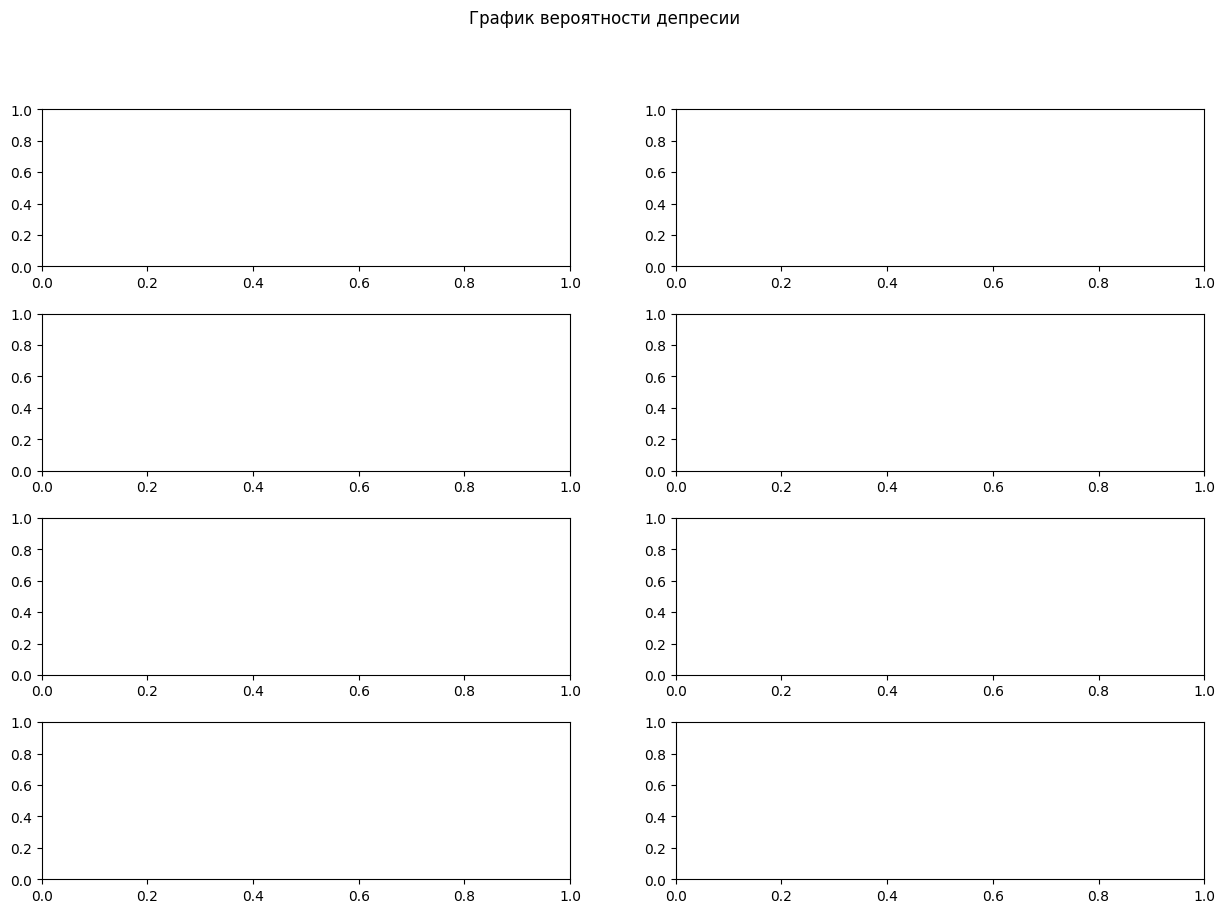

In [289]:
def plot_chances(depr_df, colNames, relName, catMap, samples):
    fig, ax = plt.subplots(len(catMap),len(colNames), figsize=(15,10))
    plt.subplots_adjust(hspace=0.3, wspace=0.2)
    plt.suptitle(f"График вероятности депресии")

    for u in range(len(colNames)):
        income_df = depr_df[
            [colNames[u], relName, "History of Mental Illness"]
        ].sort_values(by=[colNames[u]])
        income_df["Ill"] = income_df["History of Mental Illness"].map({"No": 0, "Yes": 1})
        income_df["Emp"] = income_df[relName].map(catMap)

        emp_Y = []
        emp_X = []
        emp_c_type = []
        for i in range(len(relName)):            
            emp_Y.append(income_df[income_df["Emp"]==1][colNames[u]].to_numpy())
            emp_X.append(np.arange(emp_Y.shape[0]))
            emp_c_type.append(income_df[income_df["Emp"]==1]["Ill"].to_numpy())

        emp_illness_data = [[]]
        for j in range(len(relName)):
            temp = []
            emp_delta = emp_X[j].shape[0]//samples
            for i in tqdm(range(samples)):
                emp_cols = emp_c_type[j][i*emp_delta:(i+1)*emp_delta]
                temp.append(
                    np.round(emp_cols.sum()/emp_cols.shape[0], decimals=4)
                )
            emp_illness_data.append(temp)

        for j in range(len(relName)):
            emp_ill_X = np.linspace(emp_Y.min(), emp_Y.max(), samples)
            emp_ill_Y = emp_illness_data

        ax[u, 0].set_title("Employed")
        ax[u, 0].plot(emp_ill_X, emp_ill_Y)
        ax[u, 0].set_xlabel(colNames[u])
        ax[u, 0].set_ylabel("Chance of Depression")

plot_chances(depr_df, ["Age", "Income"], 
             "Marital Status", {'Single':0, 'Married':1, 'Divorced':2, 'Widowed':2}, 
             1000)


# Regression by Health

Physical Activity Level  
Alcohol Consumption	  
Dietary Habits  
Sleep Patterns  
Chronic Medical Conditions  
History of Substance Abuse

---

History of Mental Illness



In [5]:
depr_df['History of Mental Illness'].value_counts()

History of Mental Illness
No     287943
Yes    125825
Name: count, dtype: int64

In [6]:
health = depr_df[[
    "Physical Activity Level",
    "Alcohol Consumption",
    "Dietary Habits",
    "Sleep Patterns",
    "Chronic Medical Conditions",
    "History of Substance Abuse",
    "History of Mental Illness"
]]
health_fact = health.copy()
health
# print(sorted(alcohol["Alcohol Consumption"].unique()))
# sorted(alcohol["Alcohol Consumption"].unique())
# alcohol_fact = alcohol.copy()

,Physical Activity Level,Alcohol Consumption,Dietary Habits,Sleep Patterns,Chronic Medical Conditions,History of Substance Abuse,History of Mental Illness
0,Active,Moderate,Moderate,Fair,Yes,No,Yes
1,Sedentary,High,Unhealthy,Fair,Yes,No,Yes
2,Sedentary,Low,Unhealthy,Good,No,No,No
3,Moderate,Moderate,Moderate,Poor,No,No,No
4,Sedentary,Low,Moderate,Fair,Yes,No,Yes
...,...,...,...,...,...,...,...
413763,Moderate,Low,Healthy,Good,No,No,No
413764,Active,Low,Healthy,Poor,Yes,Yes,Yes
413765,Sedentary,Moderate,Moderate,Fair,Yes,No,No
413766,Sedentary,Moderate,Moderate,Poor,No,Yes,No


In [7]:
for i in health.columns.values:
    print(i, health[i].unique())

Physical Activity Level ['Active' 'Sedentary' 'Moderate']
Alcohol Consumption ['Moderate' 'High' 'Low']
Dietary Habits ['Moderate' 'Unhealthy' 'Healthy']
Sleep Patterns ['Fair' 'Good' 'Poor']
Chronic Medical Conditions ['Yes' 'No']
History of Substance Abuse ['No' 'Yes']
History of Mental Illness ['Yes' 'No']


In [8]:
cat_map = {
    "Physical Activity Level": {"Sedentary": 0, "Moderate": 1, "Active": 2},
    "Alcohol Consumption": {"Low": 0, "Moderate": 1, "High": 2},
    "Dietary Habits": {"Unhealthy": 0, "Moderate": 1, "Healthy": 2},
    "Sleep Patterns": {"Poor": 0, "Fair": 1, "Good": 2},
    "Chronic Medical Conditions": {"No": 0, "Yes": 1},
    "History of Substance Abuse": {"No": 0, "Yes": 1},
    "History of Mental Illness": {"No": 0, "Yes": 1},
}


for label in cat_map.keys():
    health_fact[
        label
    ] = health[
        label
    ].map(cat_map[label])
health_fact

,Physical Activity Level,Alcohol Consumption,Dietary Habits,Sleep Patterns,Chronic Medical Conditions,History of Substance Abuse,History of Mental Illness
0,2,1,1,1,1,0,1
1,0,2,0,1,1,0,1
2,0,0,0,2,0,0,0
3,1,1,1,0,0,0,0
4,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...
413763,1,0,2,2,0,0,0
413764,2,0,2,0,1,1,1
413765,0,1,1,1,1,0,0
413766,0,1,1,0,0,1,0


In [10]:
print(depr_df.columns.values[-4])
depr_df.iloc[:, -4]

History of Mental Illness


0         Yes
1         Yes
2          No
3          No
4         Yes
         ... 
413763     No
413764    Yes
413765     No
413766     No
413767     No
Name: History of Mental Illness, Length: 413768, dtype: object

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Предположим, первые 6 колонок — категориальные признаки, последняя — целевая переменная
# X = health.iloc[:, :-1]
# y = health.iloc[:, -1]

X = depr_df.drop(depr_df.columns[-4], axis=1)
y = depr_df.iloc[:, -4]


# Преобразуем категориальные признаки с помощью OneHotEncoder
# encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

# Преобразуем целевую переменную "да"/"нет" в 1/0
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # "да" -> 1, "нет" -> 0

print(np.unique_counts(y_encoded).values)

# Разделим на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучим модель (например, Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Предсказания и оценка
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

[0 1]
              precision    recall  f1-score   support

          No       0.70      0.95      0.80     57471
         Yes       0.37      0.07      0.12     25283

    accuracy                           0.68     82754
   macro avg       0.53      0.51      0.46     82754
weighted avg       0.60      0.68      0.59     82754



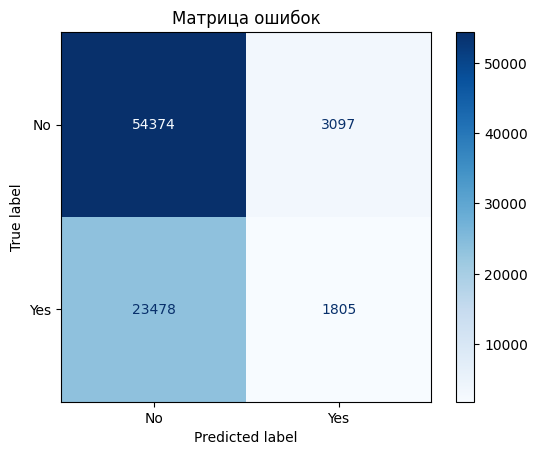

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=label_encoder.classes_, cmap="Blues")
plt.title("Матрица ошибок")
plt.show()

C:\Users\NikoSolov\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


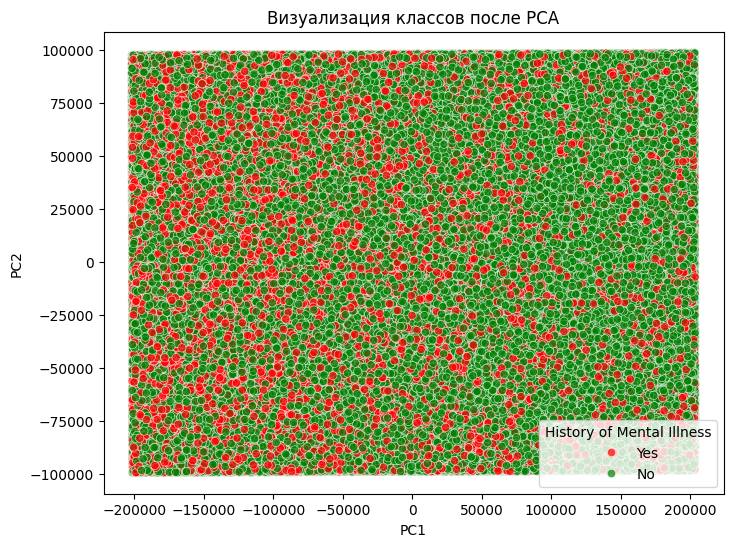

In [13]:
from sklearn.decomposition import PCA
import seaborn as sns

# Понизим размерность до 2D для визуализации
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_encoded)

# Построим график
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette=["red", "green"], alpha=0.7)
plt.title("Визуализация классов после PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
import seaborn as sns

# Пример: загрузка данных (предположим, df уже есть)
# df = pd.read_csv("data.csv")

# Разделение признаков и целевой переменной
X = depr_df.drop(depr_df.columns[-4], axis=1)
y = depr_df.iloc[:, -4]

# Кодируем категориальные признаки
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X)

# Кодируем целевой столбец ("да"/"нет") как 1/0
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # "да" -> 1, "нет" -> 0

# Преобразуем обратно в "Да"/"Нет" для наглядности
y_labels = label_encoder.inverse_transform(y_encoded)

# Понижаем размерность до 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_encoded)

# Строим график
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=y_labels,
    palette={"да": "green", "нет": "red"},
    alpha=0.7
)
plt.title("Визуализация классов: 'Да' (зелёный) и 'Нет' (красный)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Класс")
plt.grid(True)
plt.tight_layout()
plt.show()

MemoryError: Unable to allocate 1.81 TiB for an array with shape (413768, 602233) and data type float64

In [13]:
df = pd.DataFrame({'Fruit': ['Apple', 'Banana', 'Orange']})

# Custom mapping
category_map = {'Apple': 100, 'Banana': 200, 'Orange': 300}
df['Fruit_Code'] = df['Fruit'].map(category_map)
df

,Fruit,Fruit_Code
0,Apple,100
1,Banana,200
2,Orange,300


In [14]:
depr_df[depr_df["Employment Status"] == "Employed"]["Income"].max()

np.float64(209995.22)